<a href="https://colab.research.google.com/github/jjwjjwjjwjjwjjw/flower_mnist/blob/main/fasion_mnist_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torchvision.datasets as dset
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import DataLoader

In [ ]:
batch_size = 100
num_epochs = 15
learning_rate = 0.0001

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/v2.zip -d /content/drive/MyDrive/v2/
 #폴더 만들어 압축 풀기

In [ ]:
import torchvision

transform = transforms.Compose([
    transforms.Resize((28, 28)),  # 이미지 크기 조정
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.5,), std=(0.5,))
])


train_data = torchvision.datasets.ImageFolder(root="/content/drive/MyDrive/v2/Training Data", transform=transform)
test_data = torchvision.datasets.ImageFolder(root="/content/drive/MyDrive/v2/Testing Data", transform=transform)

train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True, drop_last=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=False, drop_last=True)

In [ ]:
import torchvision.models as models

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ResNet-50 v2 모델 불러오기
model = models.resnet50(pretrained=True)
num_features = model.fc.in_features
model.fc = nn.Linear(num_features, 10)  # 출력 크기를 클래스 수에 맞게 변경

model = model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
costs = []
total_batch = len(train_loader)
for epoch in range(num_epochs):
    total_cost = 0
    for i, (imgs, labels) in enumerate(train_loader):
        imgs, labels = imgs.to(device), labels.to(device)
        outputs = model(imgs)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_cost += loss.item()
    avg_cost = total_cost / total_batch
    print("Epoch:", "%03d" % (epoch+1), "Cost =", "{:.9f}".format(avg_cost))
    costs.append(avg_cost)

Epoch: 001 Cost = 1.545547075
Epoch: 002 Cost = 0.883908605
Epoch: 003 Cost = 0.519761673
Epoch: 004 Cost = 0.323407205
Epoch: 005 Cost = 0.207555375
Epoch: 006 Cost = 0.151923022
Epoch: 007 Cost = 0.146832734
Epoch: 008 Cost = 0.127379314
Epoch: 009 Cost = 0.114104807
Epoch: 010 Cost = 0.097031388
Epoch: 011 Cost = 0.090246022
Epoch: 012 Cost = 0.076049744


In [ ]:
# Evaluation
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for i, (imgs, labels) in enumerate(test_loader):
        imgs, labels = imgs.to(device), labels.to(device)
        outputs = model(imgs)
        _, argmax = torch.max(outputs, 1)
        total += imgs.size(0)
        correct += (labels == argmax).sum().item()

    print('Accuracy for {} images: {:.2f}%'.format(total, correct / total * 100))

Accuracy for 2280 images: 69.47%


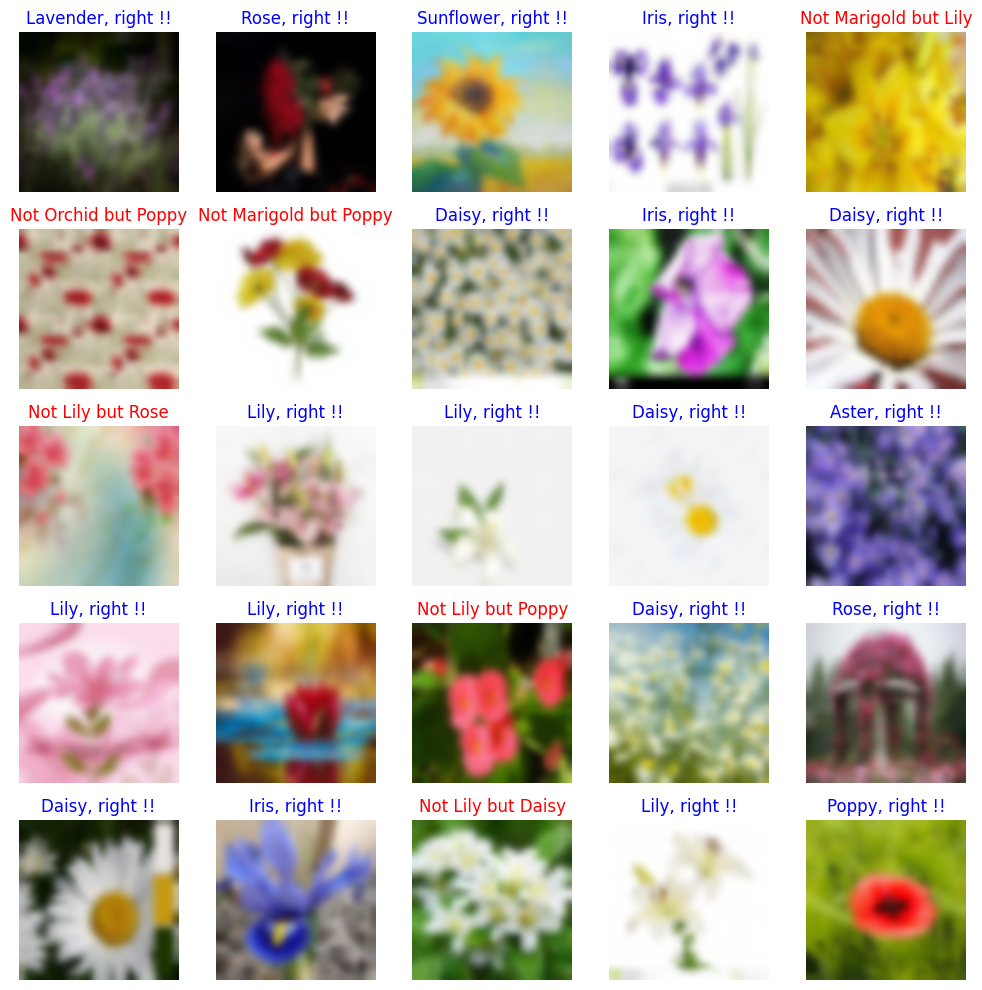

In [ ]:
label_tags = {
    0: 'Aster',
    1: 'Daisy',
    2: 'Iris',
    3: 'Lavender',
    4: 'Lily',
    5: 'Marigold',
    6: 'Orchid',
    7: 'Poppy',
    8: 'Rose',
    9: 'Sunflower'
}
columns = 5
rows = 5
fig = plt.figure(figsize=(10, 10))

model.eval()
for i in range(1, columns * rows + 1):
    data_idx = np.random.randint(len(test_data))
    input_img = test_data[data_idx][0].unsqueeze(dim=0).to(device)

    output = model(input_img)
    _, argmax = torch.max(output, 1)
    pred = label_tags[argmax.item()]
    label = label_tags[test_data[data_idx][1]]

    ax = fig.add_subplot(rows, columns, i)
    if pred == label:
        ax.set_title(pred + ', right !!', color='blue')
    else:
        ax.set_title('Not ' + pred + ' but ' + label, color='red')
    plot_img = test_data[data_idx][0]  # 이미지 정규화를 역으로 수행하지 않음
    plot_img = plot_img / 2 + 0.5  # 이미지의 정규화를 역으로 조정
    plot_img = plot_img.permute(1, 2, 0)  # 이미지 차원 변환
    ax.imshow(plot_img, interpolation='bicubic')  # 이미지 보간법 설정
    ax.axis('off')

plt.tight_layout()
plt.show()
